In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

import camera_calibration as cc
import image_pipeline as ip

%matplotlib inline

from imp import reload
reload(cc)
reload(ip)

<module 'image_pipeline' from 'D:\\github\\CarND-Advanced-Lane-Lines\\image_pipeline.py'>

### Camera Calibration
  

In [2]:
# Read image files to calibrate camera

imagefiles = sorted(glob.glob('./camera_cal/calibration*.jpg'))
testimagefiles = sorted(glob.glob('./test_images/*.jpg'))

cx = 9
cy = 6

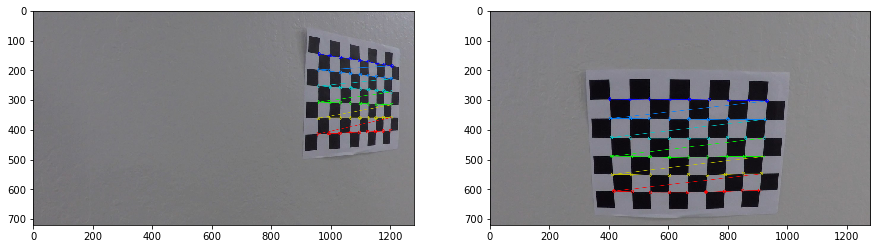

In [3]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(cc.getImageCheesboardCorners('./camera_cal\\calibration14.jpg', cx, cy))
plt.subplot(1,2,2)
plt.imshow(cc.getImageCheesboardCorners('./camera_cal\\calibration17.jpg', cx, cy))    

In [4]:
# Calibrate image
# Prepare the arrays that will hold the points

imgpoints, objpoints =  cc.getAllCalibrationPoints(imagefiles, cx, cy)
img_size = mpimg.imread(imagefiles[0]).shape
img_size = (img_size[1], img_size[0])

In [5]:
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

### Distortion Correction

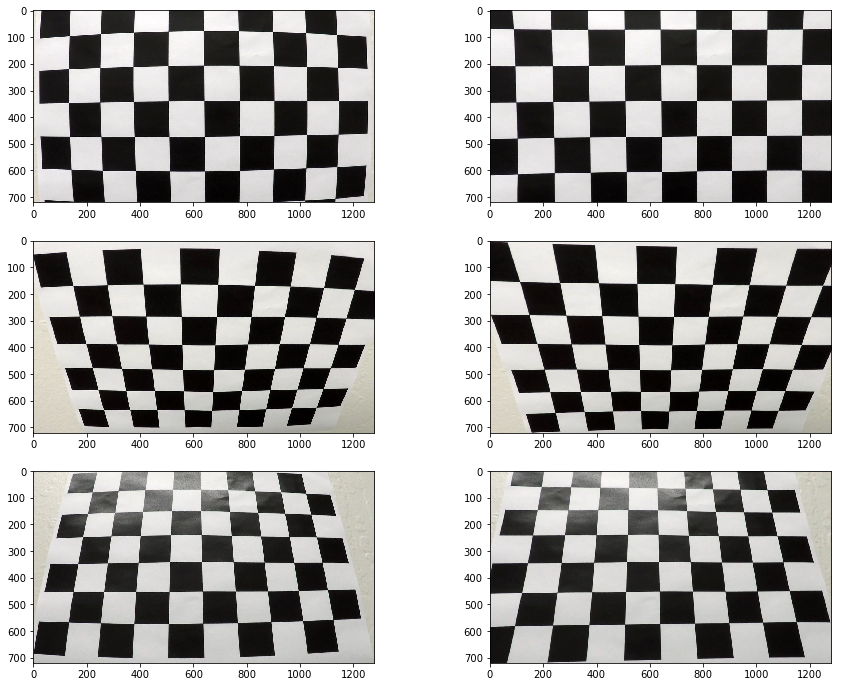

In [6]:
# Lets check the undistorted image

pltfiles =  ['./camera_cal\\calibration1.jpg',
 './camera_cal\\calibration2.jpg',
 './camera_cal\\calibration3.jpg',
 './camera_cal\\calibration4.jpg',
 './camera_cal\\calibration5.jpg']
fig = plt.figure(figsize=(15,12))
numtoplot = 3

for index, file in enumerate(pltfiles[:numtoplot]):
    img = mpimg.imread(file)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    plt.subplot(numtoplot, 2, 2*index+1)
    plt.imshow(img)
    plt.subplot(numtoplot, 2, 2*index+2)
    plt.imshow(dst)

### Color & Gradient Threshold

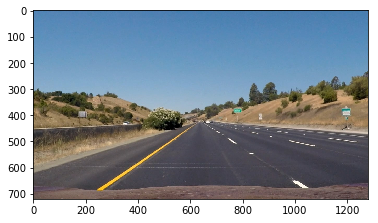

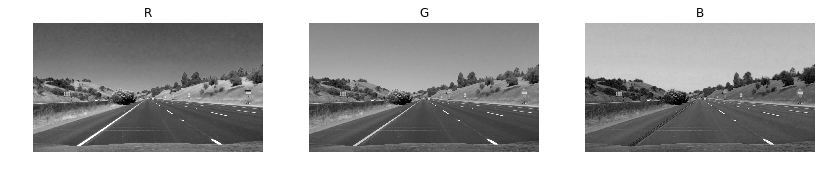

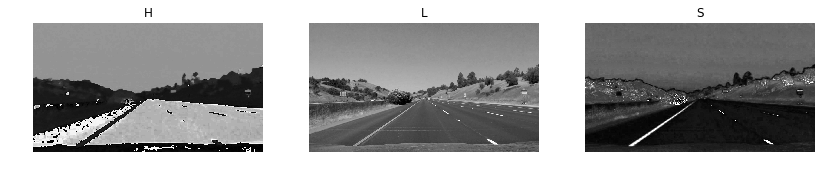

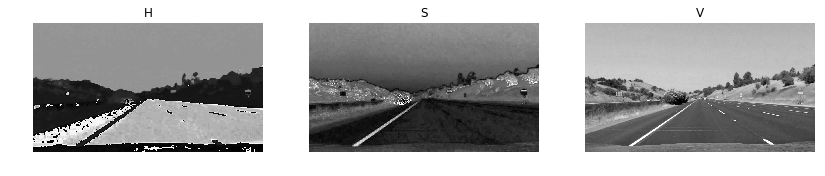

In [7]:
def printImageComponents(image, titles):
    fig = plt.figure(figsize=(14,10))
    for i in [0,1,2]:
        plt.subplot(1,3,i+1)
        plt.axis('off')
        plt.imshow(image[:,:,i], cmap='gray')
        plt.title(titles[i])
        
def printImageComparisons(img):
    plt.figure()
    plt.imshow(img)
    printImageComponents(img, ['R','G','B'])
    printImageComponents(cv2.cvtColor(img,cv2.COLOR_RGB2HLS), ['H','L','S'])
    printImageComponents(cv2.cvtColor(img,cv2.COLOR_RGB2HSV), ['H','S','V'])
    
printImageComparisons(mpimg.imread(testimagefiles[0]))

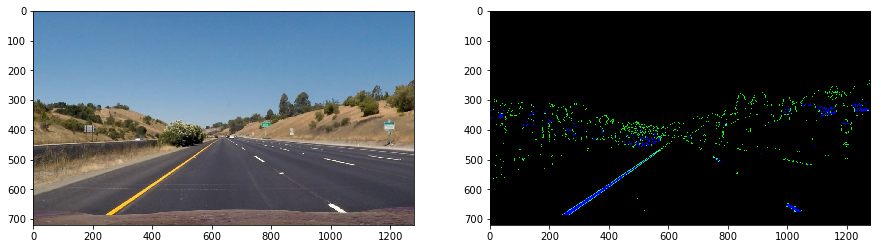

In [8]:
img =  mpimg.imread(testimagefiles[0])
imgres = ip.thresholdColorGradient(img, (150, 255), (40, 80) )

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(imgres)

### Perspective Transformation

In [9]:
# For images 1280, 720
pointsSource = np.float32([(254, 683), (600, 445), (680, 445), (1060, 683)]) #2D points locations in original 3D image
pointsDest = np.float32([(270, 720), (270, 0), (1000, 0), (1000, 720)])

M = cv2.getPerspectiveTransform(pointsSource, pointsDest)


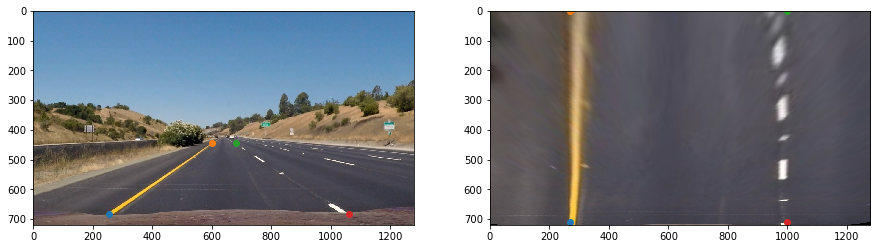

In [10]:
img =  mpimg.imread(testimagefiles[0])

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)

plt.imshow(img)
#plt.plot([270, 683], [606, 440],'o')
plt.plot(254, 683, 'o') #blue
plt.plot(600, 445, 'o') #yellow
plt.plot(680, 445, 'o') #green
plt.plot(1060, 683, 'o')  #red

plt.subplot(1,2,2)
dst = cv2.undistort(img, mtx, dist, None, mtx)
warped = cv2.warpPerspective(dst, M, (img.shape[1], img.shape[0]), flags=cv2.INTER_LINEAR)
plt.imshow(warped)
plt.plot(270, 710, 'o')
plt.plot(270, 0, 'o')
plt.plot(1000, 0, 'o')
plt.plot(1000, 710, 'o')

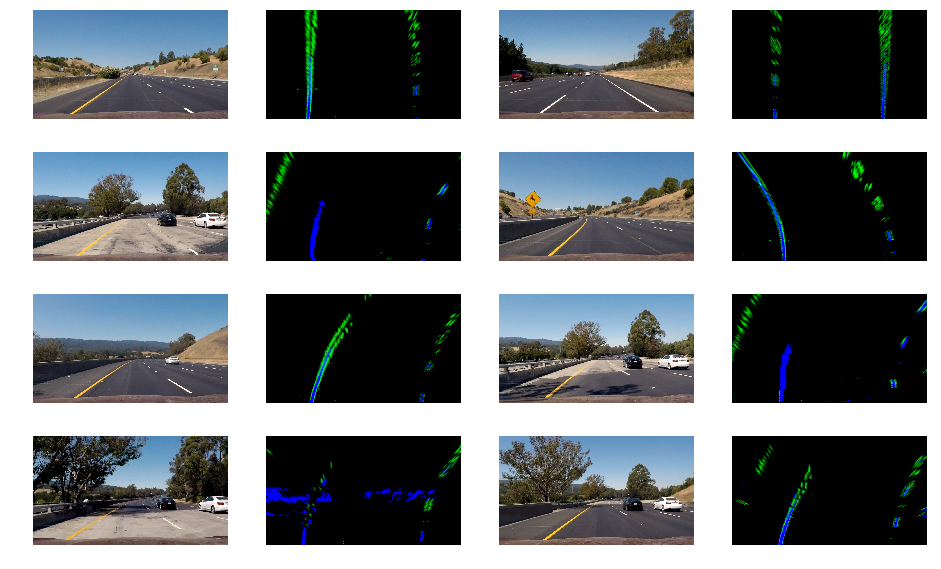

In [11]:
plt.figure(figsize=(16,10))
num = len(testimagefiles)/2
counter = 0
for fileimg in testimagefiles:
    img =  mpimg.imread(fileimg)
    plt.subplot(num,4,counter+1)
    plt.axis('off')
    plt.imshow(img)
    plt.subplot(num,4,counter+2)
    plt.axis('off')
    plt.imshow(ip.perspectiveTransformation(img, mtx, dist,M))
    counter += 2

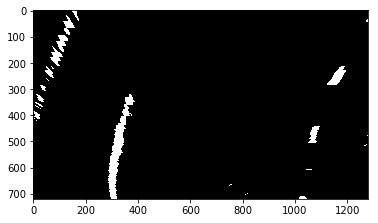

In [12]:
img = mpimg.imread(testimagefiles[2])
img = ip.perspectiveTransformation(img, mtx, dist,M, True)

plt.imshow(img, cmap='gray')


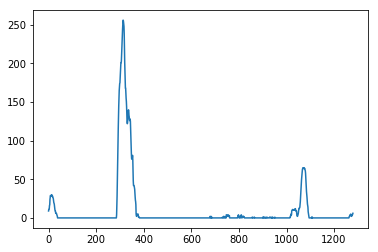

In [13]:
# How we get the initial point of the lines

histogram = np.sum(img[img.shape[0]//2:,:], axis=0)
plt.plot(histogram)

(720, 0)

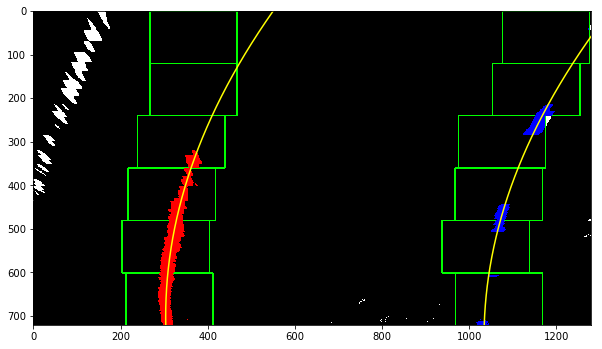

In [14]:

left_fit, right_fit, out_img = ip.findLines(img, 6, True)

ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

plt.figure(figsize=(10,10))
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)



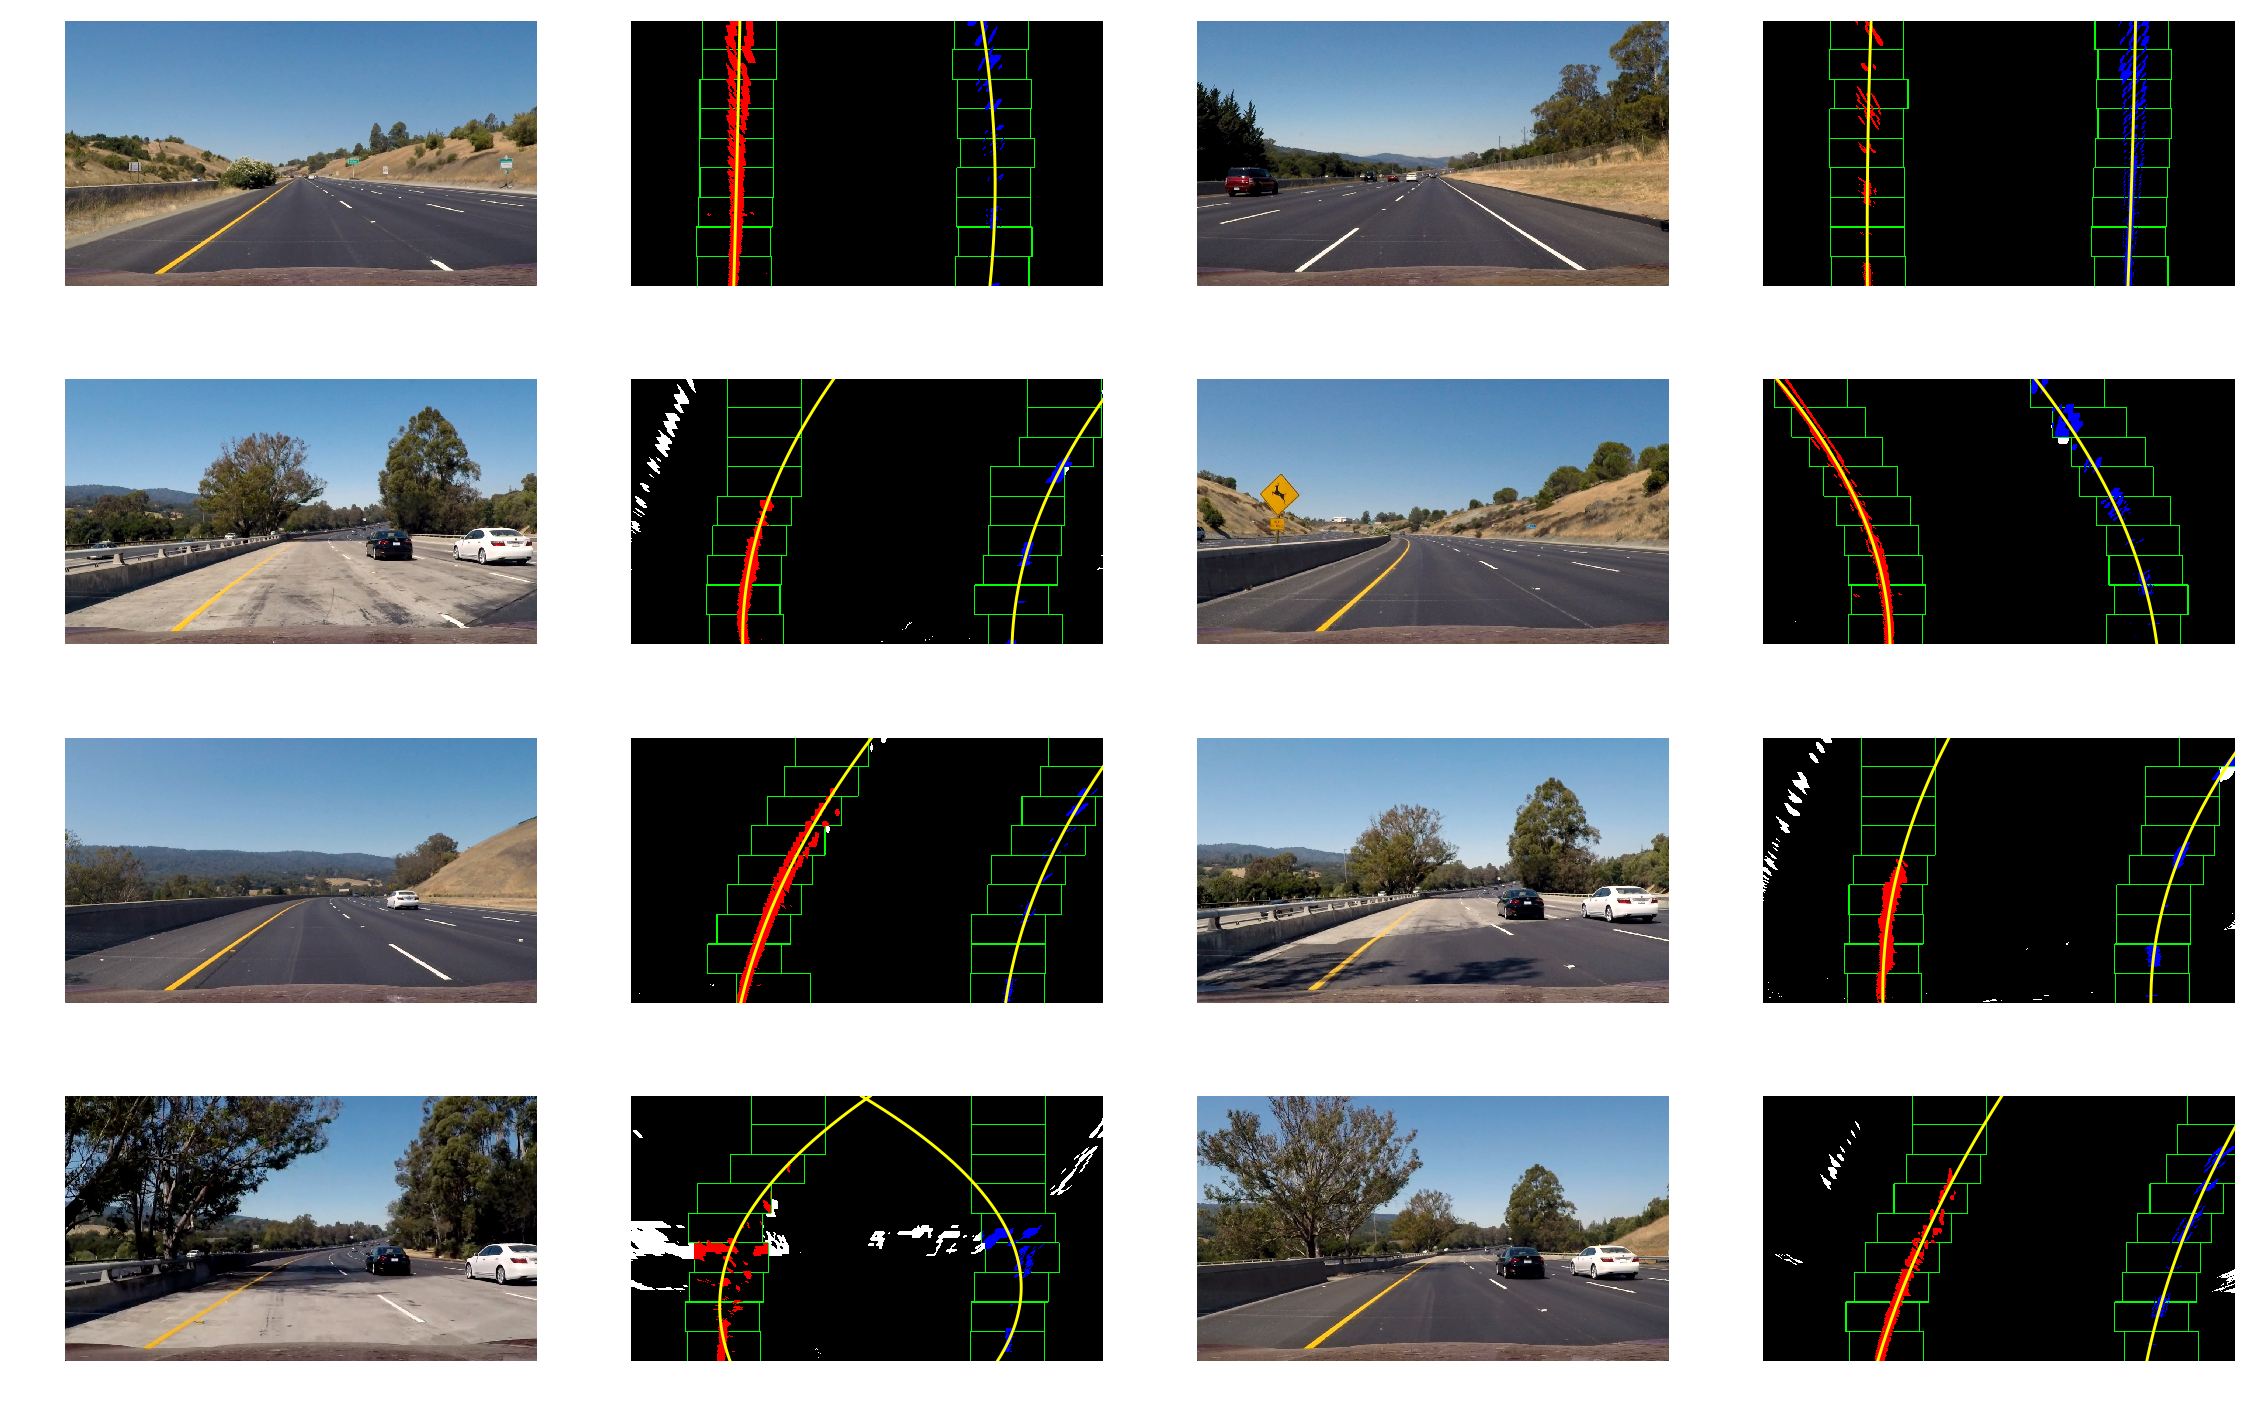

In [15]:
plt.figure(figsize=(20,13), dpi=140)
num = len(testimagefiles)/2
counter = 0
for fileimg in testimagefiles:
    img =  mpimg.imread(fileimg)
    plt.subplot(num,4,counter+1)
    plt.axis('off')
    plt.imshow(img)
    plt.subplot(num,4,counter+2)
    plt.axis('off')
    #plt.imshow(ip.perspectiveTransformation(img, mtx, dist,M))
    
    
    #img = mpimg.imread(testimagefiles[2])
    img = ip.perspectiveTransformation(img, mtx, dist,M, True)
    
    left_fit, right_fit, out_img = ip.findLines(img, 9, True)

    ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    #plt.figure(figsize=(10,10))
    plt.imshow(out_img)
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    plt.xlim(0, 1280)
    plt.ylim(720, 0)
    
    counter += 2


In [16]:

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

from imp import reload
reload(cc)
reload(ip)

<module 'image_pipeline' from 'D:\\github\\CarND-Advanced-Lane-Lines\\image_pipeline.py'>

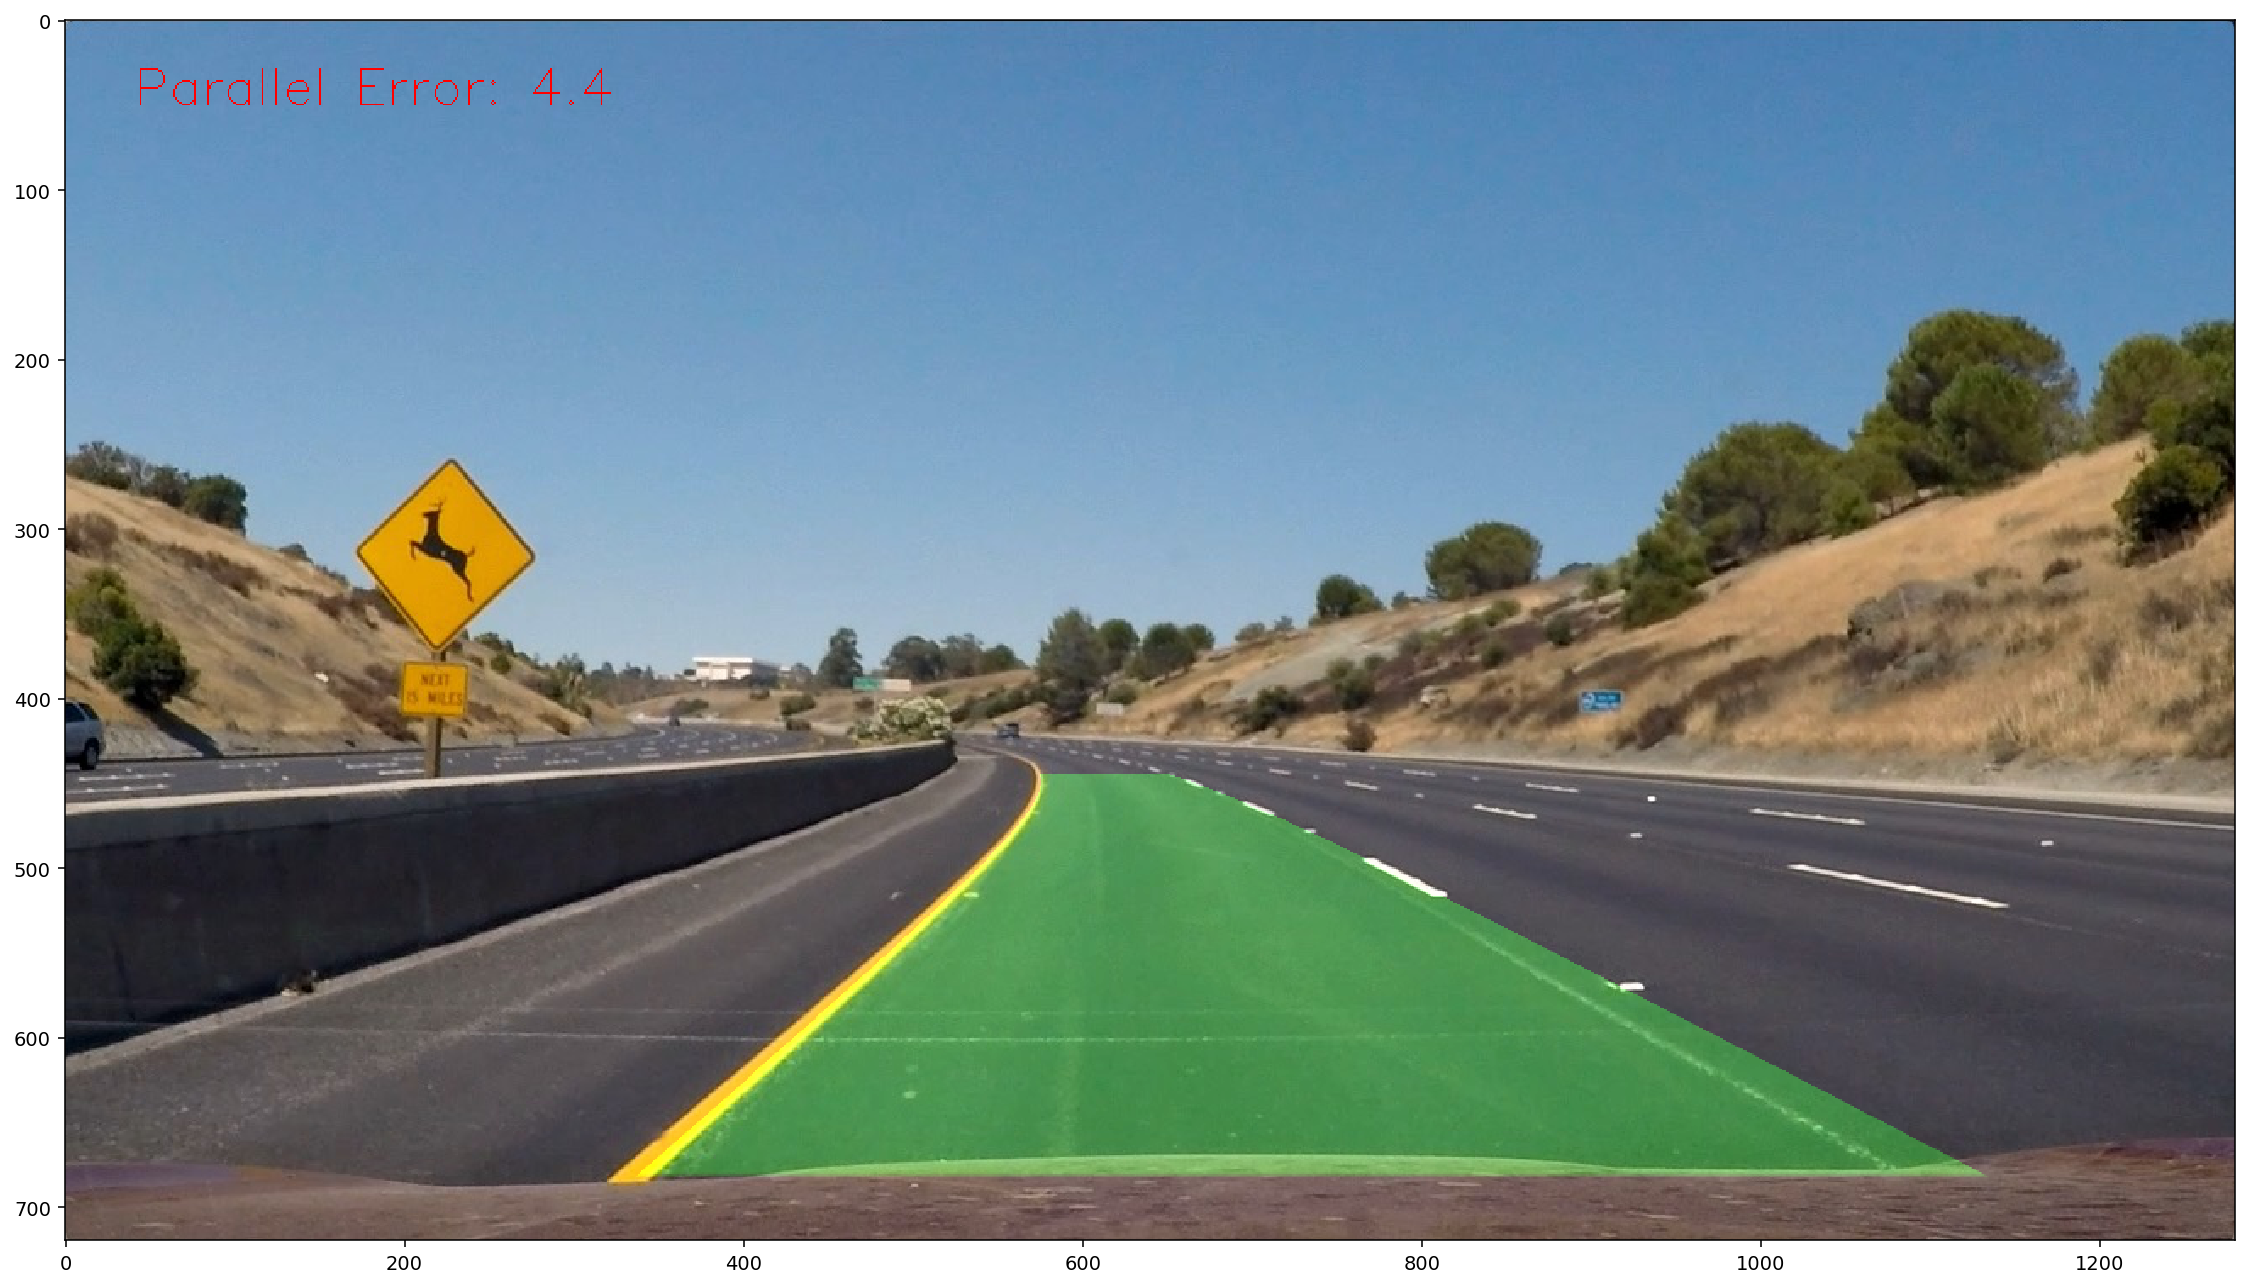

In [142]:

import linedetection as ld
reload(ld)

calibrationfiles = sorted(glob.glob('./camera_cal/calibration*.jpg'))

linedetector = ld.LineDetection()
linedetector.calibrateFromFiles(calibrationfiles, cx=9, cy=6)

pointsSource = np.float32([(254, 683), (600, 445), (680, 445), (1060, 683)]) #2D points locations in original 3D image
pointsDest = np.float32([(270, 720), (270, 0), (1000, 0), (1000, 720)])

linedetector.setPerspectiveTransformationMatrix(pointsSource, pointsDest)

plt.figure(figsize=(20,13), dpi=140)
plt.imshow( linedetector.processImage(mpimg.imread(testimagefiles[3])))

In [114]:
def paralelError(left_fit, right_fit):
    '''
    Defines standard error of parallels, the bigger the less parallel they are
    '''
    num = 5
    ploty = np.linspace(700, 10, num)
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]    

    adiff = right_fitx - left_fitx
    adiffavg = np.average(adiff)
    total = np.square(adiff - adiffavg)  
    parallelerror = np.sqrt(np.sum(total))/num
    return parallelerror


In [141]:
a=[np.array([1,2,3]), np.array([1, 4, 100]),  np.array([2, 4, 100]),  np.array([3, 4, 100])]

a[-300:]


[array([1, 2, 3]),
 array([  1,   4, 100]),
 array([  2,   4, 100]),
 array([  3,   4, 100])]

paralel Standar Error 7.34385665208


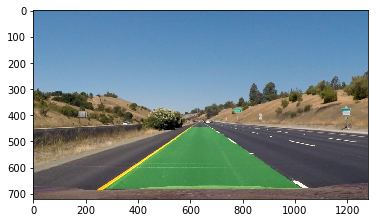

In [103]:
ploty = np.linspace(700, 10, 5)

plt.imshow( linedetector.processImage(mpimg.imread(testimagefiles[0])))
left_fit = linedetector.lineLeft.current_fit
right_fit = linedetector.lineRight.current_fit

print("paralel Standar Error:" , paralelError(left_fit, right_fit) )

paralel Standar Error: 132.829163484


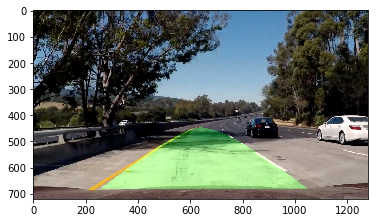

In [104]:
plt.imshow( linedetector.processImage(mpimg.imread(testimagefiles[6])))
left_fit = linedetector.lineLeft.current_fit
right_fit = linedetector.lineRight.current_fit

print("paralel Standar Error:" , paralelError(left_fit, right_fit) )

paralel Standar Error: 7.39907528173


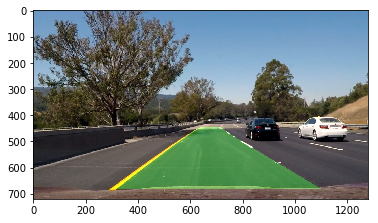

In [106]:
plt.imshow( linedetector.processImage(mpimg.imread(testimagefiles[7])))
left_fit = linedetector.lineLeft.current_fit
right_fit = linedetector.lineRight.current_fit

print("paralel Standar Error:" , paralelError(left_fit, right_fit) )

In [143]:
new_clip_output = 'test_project_video.mp4'
test_clip = VideoFileClip("project_video.mp4")

In [144]:
new_clip = test_clip.fl_image(lambda x: linedetector.processImage(x)) #NOTE: this function expects color images!!
%time new_clip.write_videofile(new_clip_output, audio=False)

[MoviePy] >>>> Building video test_project_video.mp4
[MoviePy] Writing video test_project_video.mp4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [01:56<00:00, 10.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_project_video.mp4 

Wall time: 1min 57s


In [145]:
HTML("""
<video width="640" height="480" controls>
  <source src="{0}" type="video/mp4">
</video>
""".format(new_clip_output))

In [146]:
new_clip_output2 = 'test_challenge_video.mp4'
test_clip = VideoFileClip("challenge_video.mp4")
new_clip = test_clip.fl_image(lambda x: linedetector.processImage(x)) #NOTE: this function expects color images!!
%time new_clip.write_videofile(new_clip_output, audio=False)

[MoviePy] >>>> Building video test_challenge_video.mp4
[MoviePy] Writing video test_challenge_video.mp4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 485/485 [00:44<00:00, 10.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_challenge_video.mp4 

Wall time: 44.7 s


In [147]:
HTML("""
<video width="640" height="480" controls>
  <source src="{0}" type="video/mp4">
</video>
""".format(new_clip_output2))

In [ ]:
new_clip_output3 = 'test_harder_challenge_video.mp4'
test_clip = VideoFileClip("harder_challenge_video.mp4")
new_clip = test_clip.fl_image(lambda x: linedetector.processImage(x)) #NOTE: this function expects color images!!
%time new_clip.write_videofile(new_clip_output, audio=False)

[MoviePy] >>>> Building video test_challenge_video.mp4
[MoviePy] Writing video test_challenge_video.mp4


 14%|███████████████▌                                                                                                | 167/1200 [00:15<01:34, 10.90it/s]

In [ ]:
HTML("""
<video width="640" height="480" controls>
  <source src="{0}" type="video/mp4">
</video>
""".format(new_clip_output3))